## Introduction

                                      Google Capstone Project
Cyclitic Bike Share: Case Study

Syed Amanullah

Welcome to the Cyclistic bike-share analysis case study! In this case study, I will be analysing a public data set of a bike-share company in Chicago.
The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, team will design a new marketing strategy to convert casual riders into annual members.

The following data analysis steps will be followed:
•	Ask,
•	Prepare,
•	Process,
•	Analyse,
•	Share,
•	Act.

## Ask-1

Three questions will guide the future marketing program: 
1.	How do annual members and casual riders use Cyclistic bikes differently?
2.	Why would casual riders buy Cyclistic annual memberships? 
3.	How can Cyclistic use digital media to influence casual riders to become members? 

**Business Task:**

What could motivate the “casual” users to change to an “annual” member based on their behaviour?

 ## Prepare-2
 
I will use Cyclistic’s historical trip data to analyse and identify trends. The data has been made available by Motivate International Inc. Datasets are available here link.
Key task

1.	Download data and store it appropriately.
•	Data has been downloaded and copies have been stored securely on my computer and here on Kaggle.

2.	Identify how it’s organized.
•	The data is in CSV (comma-separated values) format, and there are a total of 13 columns.

3.	Sort and filter the data.
•	For this analysis, I will be using dataset of last 12 months (Aug 2021- Sept 2022), as it is current and more relevant to the business task and it has the more complete data with geo-location coordinates.

4.	Determine the credibility of the data.
•	This is a public data of bike sharing company. Data-privacy issues prohibit me from using riders’ personally identifiable information. Have not used private information of any riders. This data is appropriate for me to answer business questions.

Load and install necessary packages.

In [1]:
# Load and install necessary packages.

library(geosphere)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Import CSV files

Aug021 <- read.csv("../input/bike-share/Bike_share_data/202108-divvy-tripdata.csv")
Sep021 <- read.csv("../input/bike-share/Bike_share_data/202109-divvy-tripdata.csv")
Oct021 <- read.csv("../input/bike-share/Bike_share_data/202110-divvy-tripdata.csv")
Nov021 <- read.csv("../input/bike-share/Bike_share_data/202111-divvy-tripdata.csv")
Dec021 <- read.csv("../input/bike-share/Bike_share_data/202112-divvy-tripdata.csv")
Jan022 <- read.csv("../input/bike-share/Bike_share_data/202201-divvy-tripdata.csv")
Feb022 <- read.csv("../input/bike-share/Bike_share_data/202202-divvy-tripdata.csv")
Mar022 <- read.csv("../input/bike-share/Bike_share_data/202203-divvy-tripdata.csv")
Apr022 <- read.csv("../input/bike-share/Bike_share_data/202204-divvy-tripdata.csv")
May022 <- read.csv("../input/bike-share/Bike_share_data/202205-divvy-tripdata.csv")
Jun022 <- read.csv("../input/bike-share/Bike_share_data/202206-divvy-tripdata.csv")
Jul022 <- read.csv("../input/bike-share/Bike_share_data/202206-divvy-tripdata.csv")

In [3]:
# Merged monthly data in to the large data frame

Bike_Data <- rbind(Aug021,Sep021,Oct021,Nov021,Dec021,Jan022,Feb022,Mar022,Apr022,May022,Jun022,Jul022)

## Process-3

In [4]:
## Data Cleaning and preparing for analysis

# Exploring Data set to know more about it.

dim(Bike_Data)#Dimesions of the data frame
colnames(Bike_Data)#Columns name of the data frame
str(Bike_Data)#Structure and data types
summary(Bike_Data) 


[1] 5847179      13

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

'data.frame':	5847179 obs. of  13 variables:
 $ ride_id           : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "10-08-2021 17:15" "10-08-2021 17:23" "21-08-2021 02:34" "21-08-2021 06:52" ...
 $ ended_at          : chr  "10-08-2021 17:22" "10-08-2021 17:39" "21-08-2021 02:50" "21-08-2021 07:08" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.8 41.8 42 42 41.8 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num  41.8 41.8 42 42 41.8 ...
 $ end_lng           : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


   ride_id          rideable_type       started_at          ended_at        
 Length:5847179     Length:5847179     Length:5847179     Length:5847179    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5847179     Length:5847179     Length:5847179     Length:5847179    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [5]:

# Dropped all na/missing values

Bike_Data <- drop_na(Bike_Data)


In [6]:
# Seprating the dates in to day,month, year and day of the week

Bike_Data$Date <- as.Date(Bike_Data$started_at)
Bike_Data$Day <- format(as.Date(Bike_Data$Date),"%d")
Bike_Data$Month <- format(as.Date(Bike_Data$Date),"%B")
Bike_Data$Year <- format(as.Date(Bike_Data$Date),"%Y")
Bike_Data$Day_OF_Week <- format(as.Date(Bike_Data$Date),"%A")

colnames(Bike_Data)# To get columns name of the data frame

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "Date"               "Day"               
[16] "Month"              "Year"               "Day_OF_Week"

In [7]:
# Suprressing warning 

options(warn=-1)

# Not allowing R to use scientific notation till specified number
 options(scipen=1000000)


Creating new column started time and ended and changing their format as format are inconsitence

In [8]:
Bike_Data$started_time <- format(Bike_Data$started_at, format = "%H:%M")

In [9]:
Bike_Data$ended_time<- format(Bike_Data$ended_at, format = "%H:%M")

In [10]:

# Adding new columns as Ride length and ride distance 

Bike_Data$ride_length <- interval(Bike_Data$started_time,Bike_Data$ended_time)

str(Bike_Data) #to inspect the structure of the columns


'data.frame':	5841481 obs. of  21 variables:
 $ ride_id           : chr  "99103BB87CC6C1BB" "EAFCCCFB0A3FC5A1" "9EF4F46C57AD234D" "5834D3208BFAF1DA" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "10-08-2021 17:15" "10-08-2021 17:23" "21-08-2021 02:34" "21-08-2021 06:52" ...
 $ ended_at          : chr  "10-08-2021 17:22" "10-08-2021 17:39" "21-08-2021 02:50" "21-08-2021 07:08" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.8 41.8 42 42 41.8 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num  41.8 41.8 42 42 41.8 ...
 $ end_lng           : num  -87.7 -87.6 -87.7 -87.7 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...
 $ Date              : Date, format: "10-08-20" "10-08-20" ..

In [11]:
Bike_Data$ride_length <-as.numeric(Bike_Data$ride_length) # Changing ride length in to numeric

In [12]:
# Ride Distance

Bike_Data$Ride_distance <- distGeo(matrix(c(Bike_Data$start_lng,Bike_Data$start_lat),ncol=2),
matrix(c(Bike_Data$end_lng,Bike_Data$end_lat),ncol=2)) 

Bike_Data$Ride_distance <- Bike_Data$Ride_distance/1000 # Distance in KM


In [13]:
# Dropped all na/missing values

Bike_Data <- drop_na(Bike_Data)

**#The data frame includes a few hundred entries when bikes where taken out of docks and checked 
for quality by Divvy where ride_length was negative or "zero"**

In [14]:
Bike_Data <-Bike_Data[!(Bike_Data$ride_length <0),]

In [15]:
#Checking clean Data

glimpse(Bike_Data)

summary(Bike_Data)

Rows: 5,841,266
Columns: 22
$ ride_id            <chr> "99103BB87CC6C1BB", "EAFCCCFB0A3FC5A1", "9EF4F46C57…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "10-08-2021 17:15", "10-08-2021 17:23", "21-08-2021…
$ ended_at           <chr> "10-08-2021 17:22", "10-08-2021 17:39", "21-08-2021…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "Clark St & Grace St", …
$ end_station_id     <chr> "", "", "", "", "", "", "", "TA1307000127", "", "",…
$ start_lat          <dbl> 41.77000, 41.77000, 41.95000, 41.97000, 41.79000, 4…
$ start_lng          <dbl> -87.68000, -87.68000, -87.65000, -87.67000, -87.600…
$ end_lat            <dbl> 41.77000, 41.77000, 41.97000, 41.95000, 41.77000, 4…
$ end_lng            <dbl> -87.68000, -87.63000, -87.66000, -87.65000, -87.620…
$ member_cas

   ride_id          rideable_type       started_at          ended_at        
 Length:5841266     Length:5841266     Length:5841266     Length:5841266    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5841266     Length:5841266     Length:5841266     Length:5841266    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

## Analyse-4

**Conducting descriptive analysis**

In [16]:

# finding mean, max and median of ride lenght

# Comparing Casual and members

summary(Bike_Data$ride_length)

Bike_Data %>% 
  group_by(member_casual)%>% summarise(AVG_ride_length=mean(ride_length),median_ride_length=median(ride_length), 
max_ride_length =max(ride_length))




     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        0       248       542     32963      1041 915148669 

member_casual,AVG_ride_length,median_ride_length,max_ride_length
<chr>,<dbl>,<dbl>,<dbl>
casual,59961.12,687,915148669
member,13041.12,466,31622307


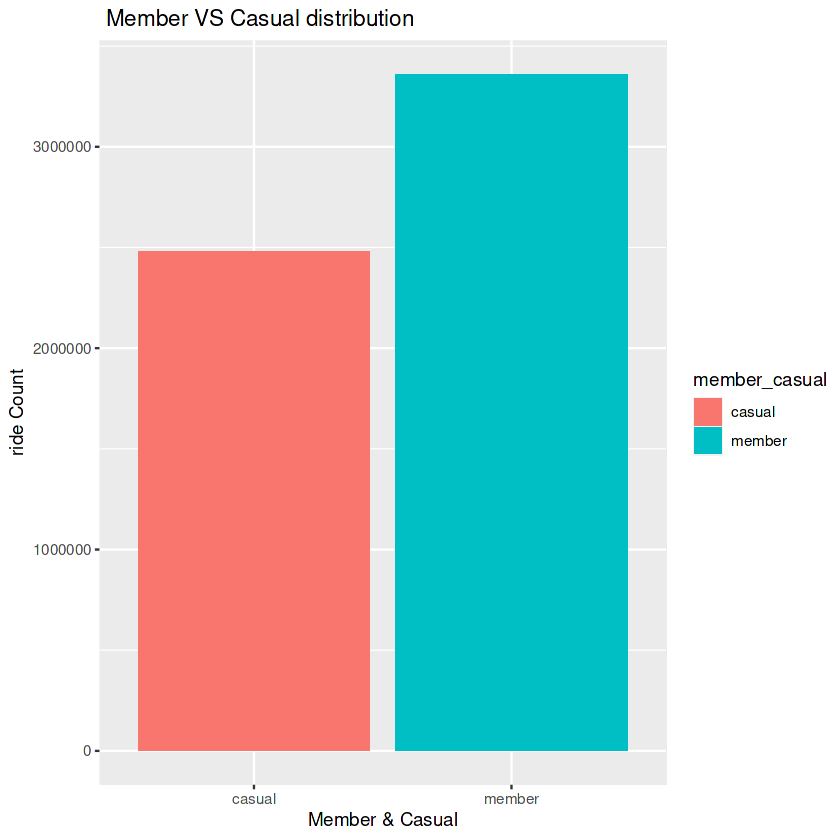

In [17]:
# Visualising member and casual rider by the total ride taken  by them

Bike_Data %>%
group_by(member_casual) %>%
summarise(ride_count=length(ride_id))%>%
ggplot(aes(x=member_casual,y=ride_count, fill =member_casual))+ geom_col(position='dodge')+
labs(title=" Member VS Casual distribution", x= "Member & Casual", y="ride Count")


By observing above chart we can see that there are more number of member riders as comparision to casual rider 

In [18]:
# Lets see Total ride count of member vs casual by each day

# Lets order the days of the week and month

Bike_Data$Day_OF_Week <- ordered(Bike_Data$Day_OF_Week, levels =c('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday',
'Saturday'))

Bike_Data %>%
 group_by(member_casual,Day_OF_Week) %>%
summarise(number_of_rides= n(),.groups ="drop") %>% arrange(member_casual,Day_OF_Week)


member_casual,Day_OF_Week,number_of_rides
<chr>,<ord>,<int>
casual,Sunday,430235
casual,Monday,319082
casual,Tuesday,277307
casual,Wednesday,315546
casual,Thursday,332248
casual,Friday,342139
casual,Saturday,463655
member,Sunday,403438
member,Monday,470655


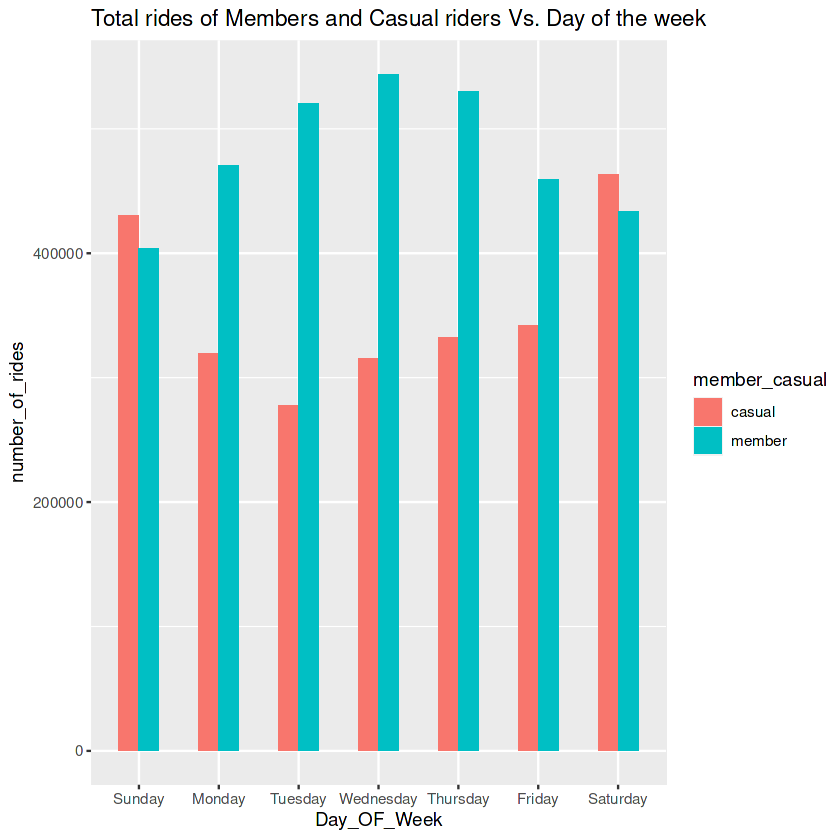

In [19]:
# Let's visualize days of the week and number of rides taken by member and casual riders.

Bike_Data %>% group_by(member_casual,Day_OF_Week) %>%
summarise(number_of_rides= n(),.groups ="drop") %>% arrange(member_casual,Day_OF_Week)%>%
ggplot(aes(x = Day_OF_Week, y = number_of_rides, fill = member_casual)) +
 labs(title ="Total rides of Members and Casual riders Vs. Day of the week") +
 geom_col(width=0.5, position = position_dodge(width=0.5)) 



> By observing above chart it is clear that casual riders are active in weekend and member are more active in weekdays as comparison to weekend.

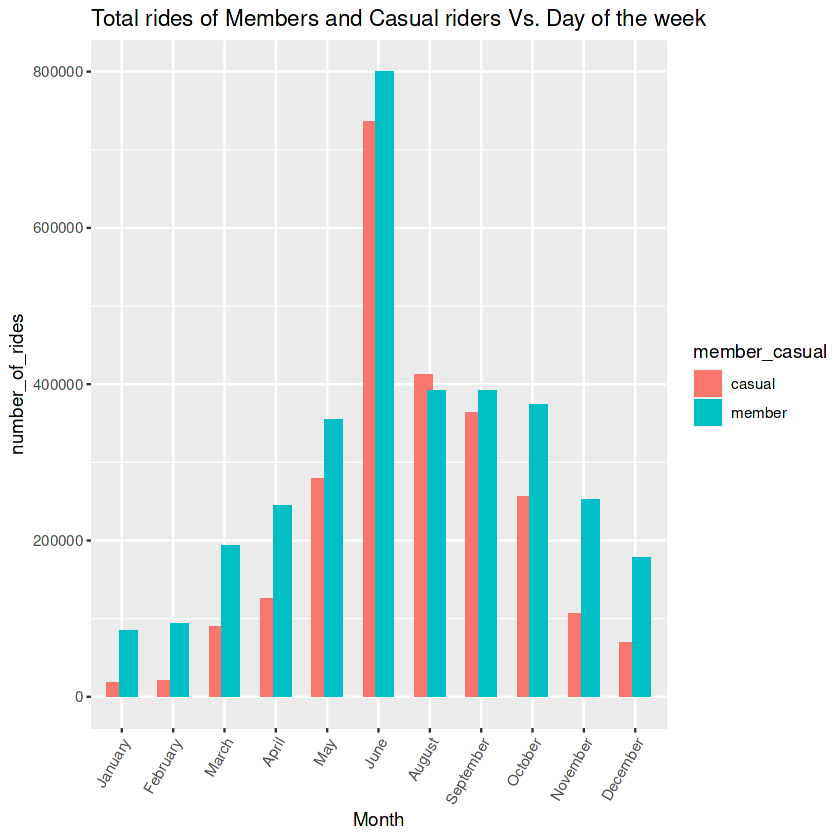

In [20]:
# By months

Bike_Data$Month <- ordered(Bike_Data$Month, levels =c('January','February','March','April','May','June','July','August','September','October','November','December'))

Bike_Data %>%
 group_by(member_casual,Month) %>%
  summarise(number_of_rides= n(),.groups ="drop") %>% arrange(member_casual,Month)%>%
ggplot(aes(x = Month, y = number_of_rides, fill = member_casual)) +
 labs(title ="Total rides of Members and Casual riders Vs. Day of the week") +
 geom_col(width=.7, position = position_dodge(width=.5)) +
theme(axis.text.x = element_text(angle = 60, hjust = 1))


> By obeserving above graph we can see that member were active throughout the year except in August where casual rider taken more ride.

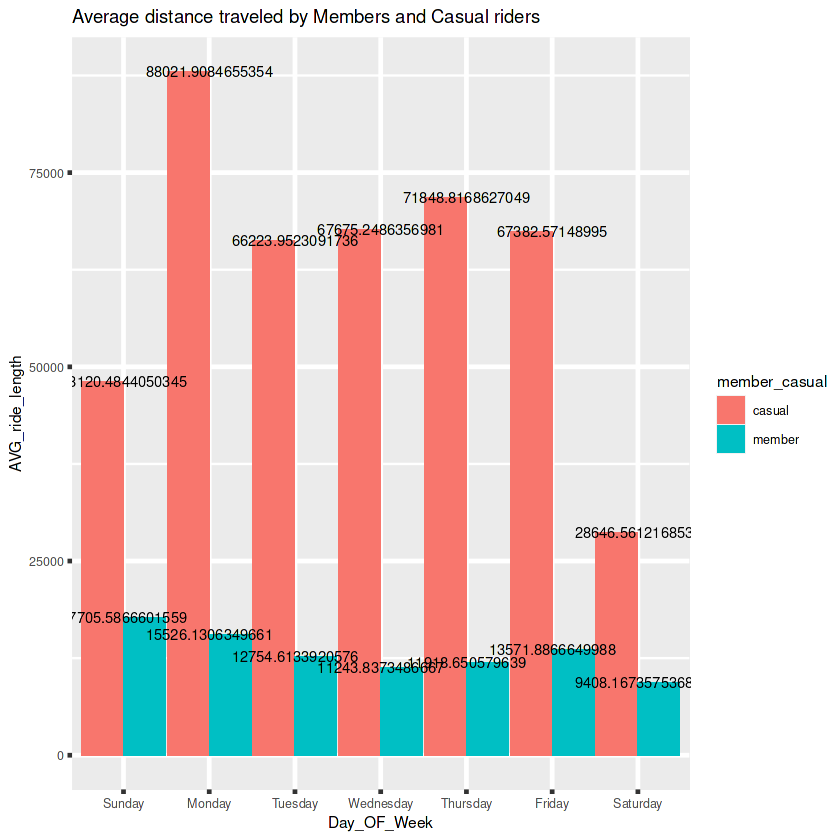

In [21]:
# Lets see Total ride length/time of member vs casual by each day

Bike_Data %>%
group_by(member_casual,Day_OF_Week) %>%
summarise(AVG_ride_length=mean(ride_length),.groups ="drop")%>% arrange(member_casual,Day_OF_Week)%>%
ggplot(aes(x = Day_OF_Week, y = AVG_ride_length,,fill=member_casual))+
 geom_col(,width=.98, position = position_dodge(width=.98)) +
  labs(title = "Average distance traveled by Members and Casual riders")+
geom_text(aes(label = AVG_ride_length, y =AVG_ride_length), size = 3)+theme(text = element_text(size = 9),element_line(size =1))


> By observing above graph we can see that ride duration is more for casual rider through the week however for member ride durtation is more on weekend.

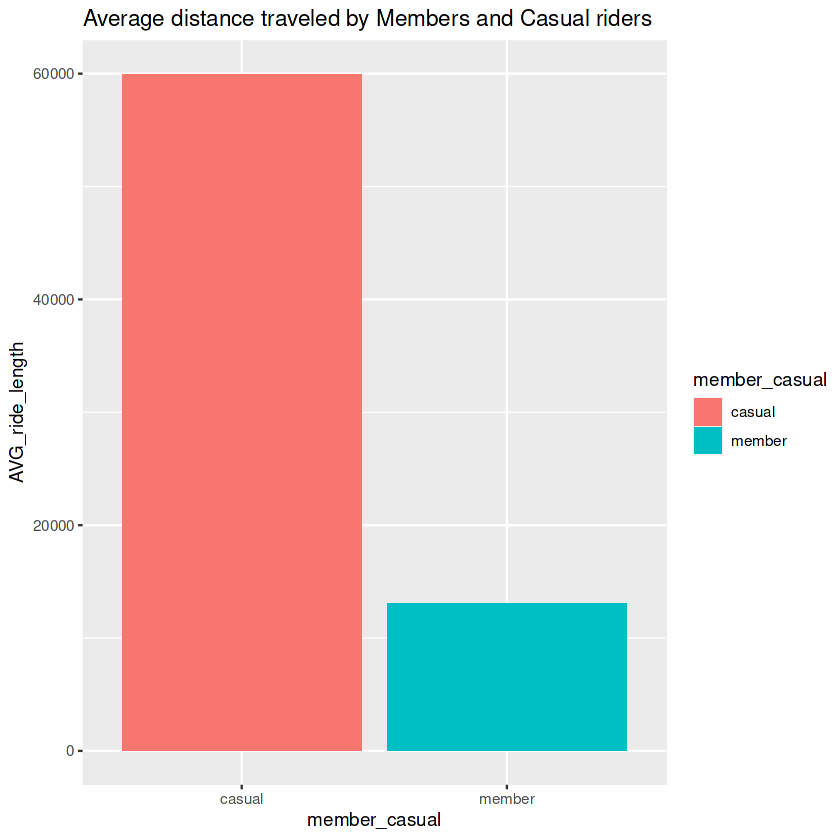

In [22]:
#Visualising riding behaviour of member and casual by ride distance

Bike_Data %>%
group_by(member_casual) %>%
summarise(AVG_ride_length=mean(ride_length))%>% arrange(member_casual)%>%
ggplot(aes(x=member_casual,y=AVG_ride_length,fill =member_casual))+
geom_col(position='dodge')+
  labs(title = "Average distance traveled by Members and Casual riders")



This graps validating the above graph that causal rider travelling more distance than member

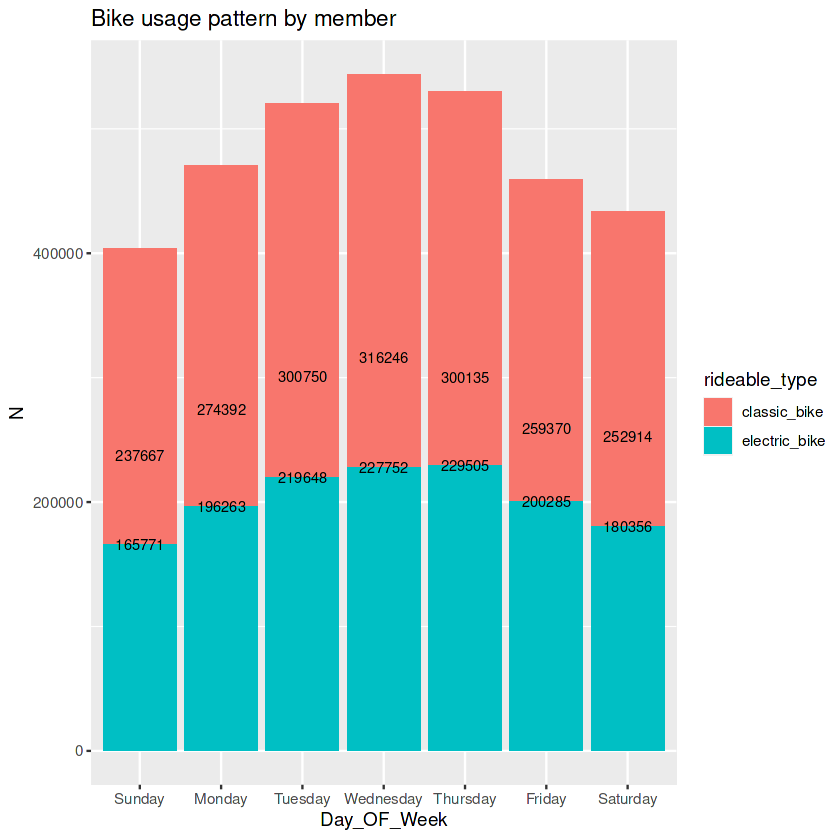

In [23]:
# Visualising bike usage pattern by member

Bike_Data %>% filter(member_casual =="member")%>%
group_by(Day_OF_Week,rideable_type) %>%
summarise(N= n(),.groups ="drop")%>% mutate(percent =N*100/sum(N))%>%
ggplot(aes(x=Day_OF_Week,y=N,fill =rideable_type),)+geom_bar(stat = 'identity')+
  labs(title = "Bike usage pattern by member")+
geom_text(aes(label =N , y =N), size = 3)

#N=Number_of_rides


By observing above graph we can see that usage of classic bike is more then electric bike by member rider

From the above graph, we can observe that casual riders went a longer distance compared to members by a few kilometer.


## Share -5

**Shared the presentation of how annual members and casual riders use Cyclistic bikes differently.
**

> Key tasks
> 1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.

**Deliverable
**
Supporting visualizations and key findings

## ACT -6

This phase will be carried out by the executive team, Director of Marketing (Lily Moreno) and the Marketing Analytics team based on my analysis.

**Conclusion**

* Member riders are active throughout the week although casual rides are active mostly on weekends.
* Member riders are taking rides throughout the year although they are more active in June, July & August, casual riders take more rides in August as compare to member.
* Casual rider riding more distance.
* Casual rider spending more time.

> There might be a reason behind this that member use bikes for work purposes, bike usage are higher in colder months, where there is a significant drop in casual members in those months.


**Deliverable**

> Top three recommendations based on the analysis.
 
* Various coupons and discounts could be handed out along with the annual subscription or weekend-only membership targeting casual riders.  
* Can host fun biking competitions with prizes at intervals for members on the weekends. Since there are lot of casual riders on weekends,this will also attract them to get a membership. 
* Create marketing campaigns which can be sent via email, or advertisement in the docking stations explaining why annual member is beneficial. Campaigns should be placed at the peak months of the year targeting casual riders. 

## Resources

[RDocumentation](http://www.rdocumentation.org)

[RStudio](http://community.rstudio.com) and [Kaggle](http://www.kaggle.com/discussion) community.



**> Thanks for reading and I hope you like it. Please give your valuable feedback.**

> For the Kaggle Notebook access and to check detailed analysis with proper output details of the code please visit my Notebook.